In [127]:
import sys
import cv2
import numpy as np
import random
import pytesseract
from IPython.core.display import HTML


from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

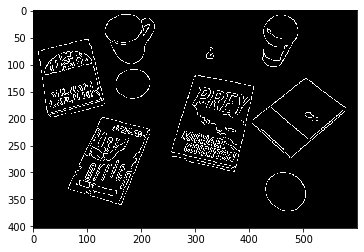

In [36]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 10, 250)

imshow("", edged)

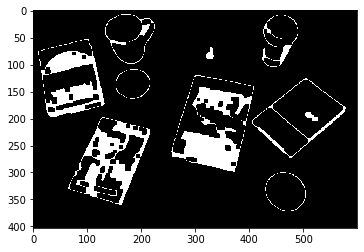

True

In [37]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", closed)

cv2.imwrite("result.png", closed)

8 4107.0
4 14433.5
9 186.0
5 5086.5
4 18758.0
8 2695.0
8 181.5
4 12818.0
12 3701.5
8 5840.0


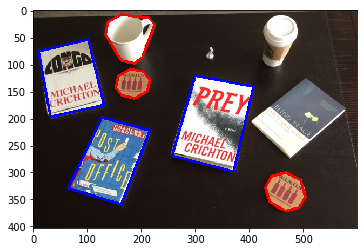

In [25]:
cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("book.jpg")
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if len(approx) == 8 and area > 200 :        
        cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    if len(approx) == 4 :        
        cv2.drawContours(image, [approx], -1, (255, 0, 0), 4)        

imshow("", image)

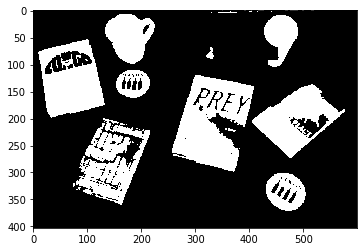

In [38]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
_, edged = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

imshow("", edged)

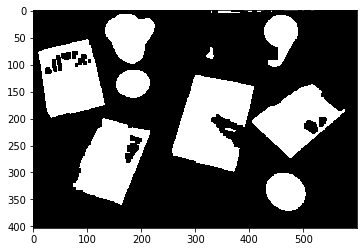

In [39]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed2 = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", closed2)

8 3928.5
6 53.5
4 13384.0
4 11608.5
7 16464.0
8 2505.0
9 152.0
4 12672.0
11 3607.0
8 5705.5
2 0.0
4 1.0
2 23.5
4 4.0
7 20.0
6 25.0
6 108.0
4 8.0


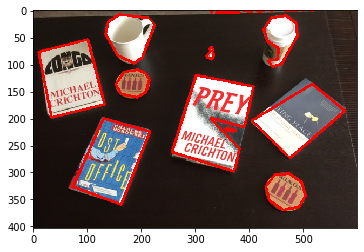

In [22]:
cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("book.jpg")
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    
imshow("", image)

8 4101.0
4 14446.0
4 13080.5
4 18789.5
8 2699.0
8 183.5
4 12816.5
13 3890.5
8 5877.0
2 0.0
4 1.0
2 23.5
4 4.0
7 20.0
6 25.0
6 108.0
4 8.0


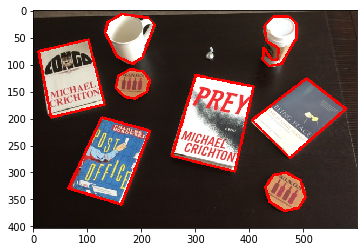

In [52]:
cnts, _ = cv2.findContours(dst, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("book.jpg")

for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if  area > 200 :
        cv2.drawContours(image, [approx], -1, (0, 0, 255), 4)
    
imshow("", image)

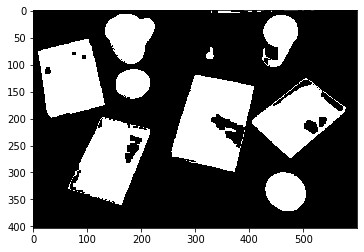

In [41]:
dst = cv2.addWeighted(closed, 0.5, closed2, 0.5, 0.0)
_, dst = cv2.threshold(dst, 127, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
imshow("", dst)

8 4101.0
4 14446.0
4 13080.5
4 18789.5
8 2699.0
8 183.5
4 12816.5
13 3890.5
8 5877.0
2 0.0
4 1.0
2 23.5
4 4.0
7 20.0
6 25.0
6 108.0
4 8.0


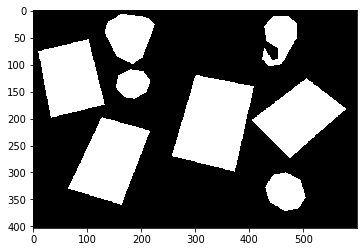

In [53]:
cnts, _ = cv2.findContours(dst, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
image = cv2.imread("book.jpg")

mask = np.zeros((image.shape[0], image.shape[1]) , dtype='uint8')
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)    
    
    print(len(approx), area)
    if  area > 200 :
        cv2.drawContours(mask, [approx], -1, (255, 255, 255), -1)
    
imshow("", mask)

# 다각형피팅

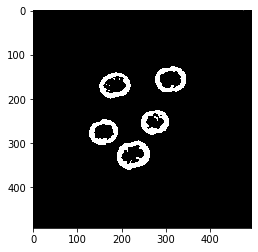

In [60]:
img = cv2.imread("coin.png", 0)
gray_blur = cv2.GaussianBlur(img, (7, 7), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255, 
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY_INV, 45, 6)

#_, thresh = cv2.threshold(gray_blur, 127, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
imshow("", thresh)




((225.80030822753906, 326.933837890625), (60.931968688964844, 77.57230377197266), 73.75495147705078)
((158.7913818359375, 275.5298156738281), (55.34067916870117, 66.23458099365234), 74.6131591796875)
((274.4893493652344, 252.61375427246094), (53.25090026855469, 64.34342956542969), 78.42022705078125)
((184.22079467773438, 169.91505432128906), (55.9996223449707, 70.2265625), 77.4986801147461)
((310.2690734863281, 156.6083984375), (57.620994567871094, 71.02620697021484), 84.69145202636719)
((474.0, 1.0), (1.632993221282959, 2.8284270763397217), 135.0)


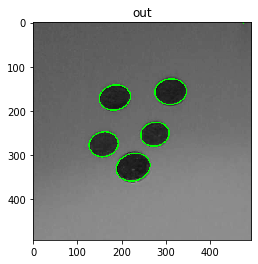

In [67]:
img = cv2.imread("coin.png")
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    area = cv2.contourArea(cnt)
    if len(cnt) < 5:
        continue
    ellipse = cv2.fitEllipse(cnt)
    print(ellipse)
    cv2.ellipse(img, ellipse, (0,255,0), 2)       
imshow("out", img)                               

# 손가락검출

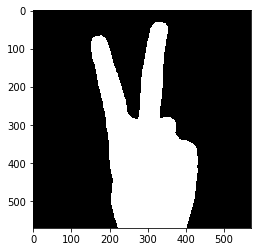

In [137]:
hand_img = cv2.imread("2.jpg")

hsv_img = cv2.cvtColor(hand_img, cv2.COLOR_BGR2HSV)
lower_band = np.array([0, 23, 0])
upper_band = np.array([255, 189, 255])

mask = cv2.inRange(hsv_img, lower_band, upper_band)
mask = cv2.medianBlur(mask, 5)

imshow("", mask)

1
302.5169677734375 308.2913513183594 278.68975830078125


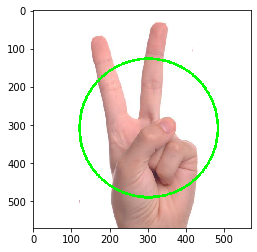

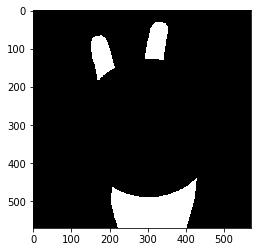

In [138]:
cnts,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = cnts[0]

print(len(cnts))

(cX, cY), r = cv2.minEnclosingCircle(c)

print(cX, cY, r)

cv2.circle(hand_img , (int(cX), int(cY)), int(r*0.65), (0, 255, 0), 5)

imshow("", hand_img)
cv2.circle(mask, (int(cX), int(cY)), int(r*0.65) , (0, 0,0), -1)
imshow("", mask)

In [139]:
cnts,_ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print("number of finger is:" ,len(cnts)-1)

for c in cnts :
    area = cv2.contourArea(c)
    print(area)

number of finger is: 2
18666.0
4598.0
4382.0


{'m00': 18666.0, 'm10': 5893447.166666666, 'm01': 9715636.166666666, 'm20': 1934494179.5, 'm11': 3062780642.0, 'm02': 5071625049.166666, 'm30': 657141816224.05, 'm21': 1003272607001.3667, 'm12': 1596513640109.4333, 'm03': 2654960506389.35, 'mu20': 73746322.09662747, 'mu11': -4753293.433721542, 'mu02': 14645186.151486397, 'mu30': -207339842.1850586, 'mu21': -628338413.7062683, 'mu12': 189214029.0685959, 'mu03': -61370388.650878906, 'nu20': 0.2116595375508356, 'nu11': -0.013642441567549504, 'nu02': 0.04203319216527099, 'nu30': -0.004355666401176246, 'nu21': -0.013199742453290994, 'nu12': 0.003974890596809083, 'nu03': -0.0012892309411289028}
{'m00': 4598.0, 'm10': 822563.3333333333, 'm01': 551774.6666666666, 'm20': 148056274.3333333, 'm11': 99160598.33333333, 'm02': 69835019.0, 'm30': 26811573082.4, 'm21': 17927861378.833332, 'm12': 12594300837.966667, 'm03': 9253950689.0, 'mu20': 903069.169252336, 'mu11': 450374.526847437, 'mu02': 3620298.953216389, 'mu30': 1802375.8487586975, 'mu21': -5

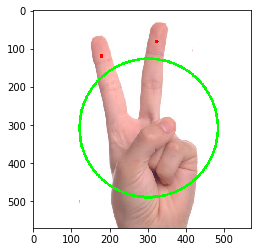

In [140]:
for c in cnts :
    M = cv2.moments(c)
    print(M)
    cX = int(M["m10"]/M["m00"])
    cY = int(M["m01"]/M["m00"])
    if  cY <=  500 :    
        cv2.circle(hand_img, (int(cX), int(cY)), 5, (0, 0, 255), -1) 
imshow("", hand_img)

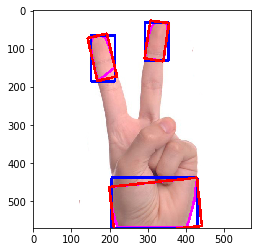

In [154]:
hand_img = cv2.imread("2.jpg")

for c in cnts :
    hull = cv2.convexHull(c)
    cv2.drawContours(hand_img, [hull], 0, (255, 0, 255), 5)       
    
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(hand_img, (x, y), (x + w, y + h), (255, 0, 0), 5)
    
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    cv2.drawContours(hand_img,[box],0,(0,0,255),5)      
    
imshow("", hand_img)

# 명함추출

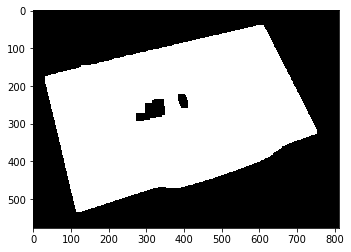

In [52]:
img = cv2.imread('namecard.png', 0)
gray = cv2.GaussianBlur(img, (7, 7), 0)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
_,binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |  cv2.THRESH_OTSU)

open = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
closed = cv2.morphologyEx(open, cv2.MORPH_CLOSE, kernel, iterations=3)

imshow("", closed)

In [53]:
cnts,_ = cv2.findContours(closed, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

c = cnts[0]
peri = cv2.arcLength(c, True)
approx = cv2.approxPolyDP(c, 0.02 * peri, True)
print(approx)

[[[611  40]]

 [[ 32 175]]

 [[114 534]]

 [[751 327]]]


In [54]:
def ordering(approx) :
    ps = approx [:,0]
    cx = np.mean(ps[:,0])
    cy = np.mean(ps[:,1])    
    pts = np.zeros((4,2), dtype='float32')    
    for p in ps :
        sx = p[0] - cx
        sy = p[1] - cy
        if  sx < 0 and sy < 0  : pts[0] = p
        if  sx > 0 and sy < 0  : pts[1] = p
        if  sx < 0 and sy > 0  : pts[2] = p
        if  sx > 0 and sy > 0  : pts[3] = p    
    return pts

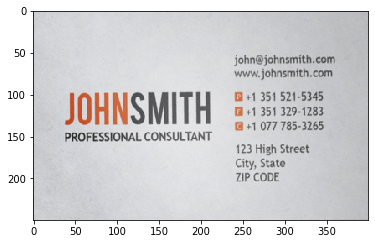

In [55]:
img = cv2.imread('namecard.png')
pts1 = ordering(approx)
pts2 = np.float32([[0,0],[400,0],[0,250],[400,250]])
M = cv2.getPerspectiveTransform(pts1,pts2)
img_result = cv2.warpPerspective(img, M, (400,250))        

imshow("", img_result)

In [59]:
print(pytesseract.image_to_string(img_result))

JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com
www.johnsmith.com

+1 351 521-5345
+1 351 329-1283
+1 077 785-3265,

123 High Street
City, State
ZIP CODE



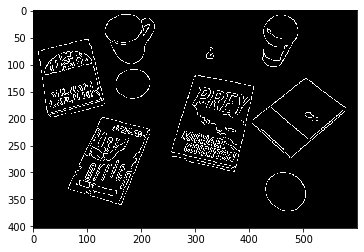

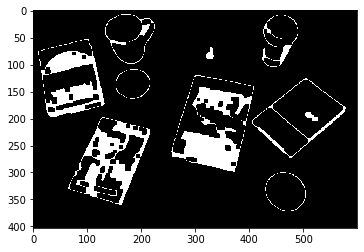

[[127. 198.]
 [216. 223.]
 [ 65. 329.]
 [163. 359.]]


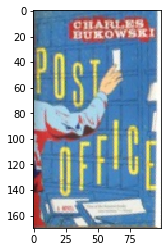

[[  0.   0.]
 [579. 182.]
 [475. 273.]
 [  0.   0.]]


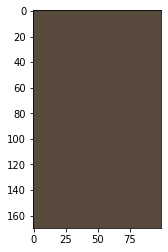

[[301. 120.]
 [408. 141.]
 [257. 269.]
 [373. 298.]]


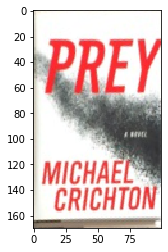

[[ 10.  76.]
 [102.  54.]
 [ 33. 198.]
 [132. 173.]]


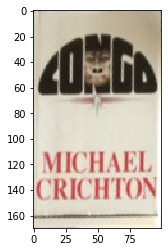

In [50]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(gray, 10, 250)

imshow("", edged)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel, iterations=1)
imshow("", closed)

cnts, _ = cv2.findContours(closed, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)

for c in cnts:
    peri = cv2.arcLength(c, True)    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)            
    if len(approx) == 4 : 
        pts1 = ordering(approx)
        print(pts1)
        pts2 = np.float32([[0,0],[100,0],[0,170],[100,170]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        img_result = cv2.warpPerspective(image, M, (100,170))        
        imshow("", img_result)

# OCR

In [61]:
print(pytesseract.image_to_string('htext.png', lang='kor'))


img = cv2.imread('htext.png', 0)
print(pytesseract.image_to_string(img, lang='kor'))

알찬 글: 스탠 코벨레스키          더 보기

스탠 코벨레스키(5130

ㄷ061690, 1889년 7월 13일 ~

1984년 3월 20일)는 미국의 전

프로 야구 선수로, 1910년대와

20년대에 메이저 리그 베이스

             볼041Ｌ8)에서 스핏볼 투수로 활

약하였다. 14시즌 동안 아메리칸 리그 (41)에서
뛰어 통산 450경기에 출전해 3,082이닝을 던지
며 215승 142패, 224완투, 38완봉, 2.89의 평균
자책점을 기록했다. 1969년 야구 명예의 전당에
입성했다.
1908년에 프로 경력을 시작했다. 마이너 리그 (#)
팀 랭커스터 레드로지스에서 뛰다가 1912년 필

알찬 글: 스탠 코벨레스키          더 보기

스탠 코벨레스키(5130
00081650, 1889년 7월 13일 ~
1984년 3월 20일)는 미국의 전
프로 야구 선수로, 1910년대와
20년대에 메이저 리그 베이스
님             볼041Ｌ8)에서 스핏볼 투수로 활
약하였다. 14시즌 동안 아메리칸 리그 (41)에서
뛰어 통산 450경기에 출전해 3.082이닝을 던지
며 215승 142패, 224완투, 38완봉, 2.89의 평균
자책점을 기록했다. 1969년 야구 명예의 전당에

1908년에 프로 경력을 시작했다. 마이너 리그
팀 랭커스터 레드로지스에서 뛰다가 1912년 필



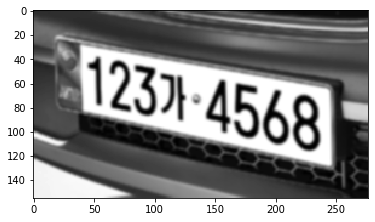

…_



In [110]:
img = cv2.imread('plate3.png', 0)
img = cv2.GaussianBlur(img, (5, 5), 0)
_,binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY )
imshow("", img)
print(pytesseract.image_to_string(binary, lang='kor'))

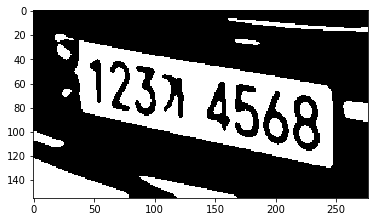

In [111]:
img = cv2.imread('plate3.png', 0)
img = cv2.GaussianBlur(img, (11, 11), 0)
_,binary = cv2.threshold(img, 128, 255, cv2.THRESH_BINARY )

imshow("", binary)

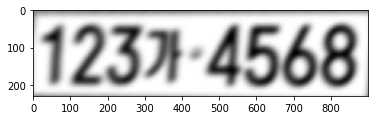

1234-4568



In [112]:
cnts, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL,
                           cv2.CHAIN_APPROX_SIMPLE)
for c in cnts:
    peri = cv2.arcLength(c, True)    
    area = cv2.contourArea(c)    
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)            
    if area >= 10000 and len(approx) == 4 :   
        pts1 = ordering(approx)
        pts2 = np.float32([[0,0],[900,0],[0,230],[900,230]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        img_result = cv2.warpPerspective(img , M, (900,230))        
        imshow("", img_result)
        
print(pytesseract.image_to_string(img_result, lang='kor'))

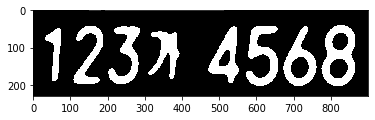

In [113]:
_,binary = cv2.threshold(img_result, 128, 255, cv2.THRESH_BINARY_INV )    
imshow("",binary)

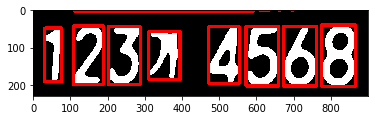

In [123]:
cnts, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img_color = cv2.cvtColor(binary, cv2.COLOR_GRAY2BGR)

for c in cnts:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img_color, (x, y), (x + w, y + h), (0, 0, 255), 8)      
    
imshow("", img_color)

# Web 기반 모니터링

In [124]:
%%writefile server.py

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요</h1>    
    """
    return  html


if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Writing server.py


In [126]:
import requests

response = requests.get("http://localhost:8000")
print(response.text)


    <h1>안녕하세요</h1>    
    


In [128]:
HTML(response.text)

In [131]:
response = requests.get("http://localhost:8000/fun?op1=1&op=3")

print(response.text)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<title>404 Not Found</title>
<h1>Not Found</h1>
<p>The requested URL was not found on the server. If you entered the URL manually please check your spelling and try again.</p>



In [135]:
%%writefile server.py

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요</h1>    
    """
    return  html

@app.route('/fun')
def fun():
    op1 = int(request.args.get("op1"))
    op2 = int(request.args.get("op2"))    
    html = "<font color=blue>" + str((op1+op2)) + "</font>"    
    return  html

if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [137]:
response = requests.get("http://localhost:8000/fun?op1=1&op2=3")
HTML(response.text)

In [149]:
datas = [7.5, 6.7, 0.5, 3.4]

for data in datas : 
    response = requests.get("http://localhost:8000/signal?data=" + 
                            str(data))  
    print(response.text)

['7.5', '6.7', '0.5', '3.4', '7.5']
['7.5', '6.7', '0.5', '3.4', '7.5', '6.7']
['7.5', '6.7', '0.5', '3.4', '7.5', '6.7', '0.5']
['7.5', '6.7', '0.5', '3.4', '7.5', '6.7', '0.5', '3.4']


In [146]:
%%writefile server.py

from flask import Flask, request

app = Flask(__name__)

@app.route('/')
def index():
    html = """
    <h1>안녕하세요</h1>    
    """
    return  html

datas = []

@app.route('/signal')
def signal():
    global datas
    datas.append( request.args.get("data")  )   
    return str(datas)

@app.route('/view')
def view():
    global datas    
    
    html = """
     <meta http-equiv="refresh" content="5; url=/view">    
    """ + str(datas)
    return  html
if __name__ == '__main__':
     app.run(host='0.0.0.0', debug=True, port=8000)      

Overwriting server.py


In [148]:
response = requests.get("http://localhost:8000/view")
HTML(response.text)   